In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt

from matplotlib import style
from matplotlib.widgets import Cursor, Button
import pandas as pd
import mplcursors
#%matplotlib inline
style.use('ggplot')
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [2]:
xl = pd.ExcelFile("E:\\THESIS\\ADNI_data\\ADNI1_Annual_2_Yr_3T_306_WORK\\LogRegClassifier\\all_GLCM_results.xlsx")

dataX = [1,2,3,4,5,6,7]

sheets = ['dtree_unique_max','gaussnb_unique_max','kn_unique_max','logreg_unique_max','lda_unique_max','randforest_unique_max','svc_unique_max']


In [3]:
classifiers = []

for i in range(7):
    classifiers.append(pd.read_excel(xl,sheets[i]))


In [4]:
accuracies = []

for i in range(len(classifiers)):
    accuracies.append(list(classifiers[i]['% ACCURACY']*100))


In [5]:
n = int(input('Enter component no. >> '))
xd = list(range(1,8))

yd = []

for i in range(7):
    yd.append(accuracies[i][n-1])


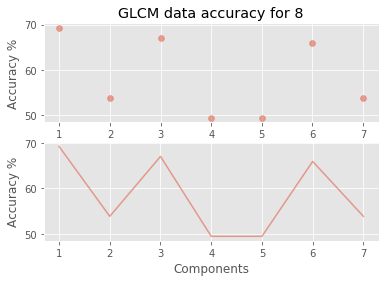

In [6]:
fig, ax = plt.subplots(2)
ax[0].set_title('GLCM data accuracy for {}'.format(n))
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Accuracy %')
ax[1].set_xlabel('Components')
ax[1].set_ylabel('Accuracy %')


ax[0].scatter(xd, yd, alpha=0.5)
ax[1].plot(xd, yd, alpha=0.5)

mplcursors.cursor(hover=True)
plt.show()

In [10]:
def visualize(n):
    xl = pd.ExcelFile("E:\\THESIS\\ADNI_data\\ADNI1_Annual_2_Yr_3T_306_WORK\\LogRegClassifier\\all_GLCM_results.xlsx")

    dataX = [1,2,3,4,5,6,7]

    sheets = ['dtree_unique_max','gaussnb_unique_max','kn_unique_max','logreg_unique_max','lda_unique_max','randforest_unique_max','svc_unique_max']

    classifiers = []

    for i in range(7):
        classifiers.append(pd.read_excel(xl,sheets[i]))

    dtree = pd.read_excel(xl,sheets[0])
    gnb = pd.read_excel(xl,sheets[1])
    kn = pd.read_excel(xl,sheets[2])
    log = pd.read_excel(xl,sheets[3])
    lda = pd.read_excel(xl,sheets[4])
    rf = pd.read_excel(xl,sheets[5])
    sv = pd.read_excel(xl,sheets[6])

    accuracies = []

    for i in range(len(classifiers)):
        accuracies.append(list(classifiers[i]['% ACCURACY']*100))

    xd = list(range(1,8))

    yd = []

    for i in range(7):
        yd.append(accuracies[i][n-1])

    fig, ax = plt.subplots(2)
    
    ax[0].set_title('classifier performance on GLCM data')
    ax[0].set_xlabel('Components')
    ax[0].set_ylabel('Accuracy %')
    
    ax[1].set_xlabel('Components')
    ax[1].set_ylabel('Accuracy %')
    plt.xticks(xd,['D-Tree','G-NB','KNeighbor','Log-Reg','LDA','Rand-Forest','SVC'])
    

    ax[0].scatter(xd, yd, alpha=0.5,s=7)
    ax[1].plot(xd, yd, alpha=0.5)

    mplcursors.cursor(hover=True)
    plt.show()
    print('For component #%d >>'%n)
    print('1. Decision-tree classifier - {0:.2f}%'.format(yd[0]))
    print('2. Gaussian NB classifier - {0:.2f}%'.format(yd[1]))
    print('3. KNeighbor classifier - {0:.2f}%'.format(yd[2]))
    print('4. Logistic regression classifier - {0:.2f}%'.format(yd[3]))
    print('5. LDA classifier - {0:.2f}%'.format(yd[4]))
    print('6. Random forest classifier - {0:.2f}%'.format(yd[5]))
    print('7. SVM classifier - {0:.2f}%'.format(yd[6]))

interact(visualize,n=(1,300,1))

interactive(children=(IntSlider(value=150, description='n', max=300, min=1), Output()), _dom_classes=('widget-…

<function __main__.visualize(n)>